In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test_set = pd.read_csv("../data/ml-100K/testing_set_seed123_ml100k.csv",sep=",",
    header=None,
    names=["userID", "itemID", "Rating"],)
test_set


,userID,itemID,Rating
0,101,450,4
1,101,365,2
2,101,285,4
3,101,310,3
4,101,460,4
...,...,...,...
20234,724,710,3
20235,724,130,4
20236,724,280,4
20237,724,175,4


In [3]:
all_users_tp = test_set.groupby('userID')['itemID'].apply(list).tolist()
all_users_tp.__len__()

943

In [4]:

mf = "model_reco/mf/reco_matrix_mf_100k_100.npy"
neumf = "model_reco/neumf/reco_matrix_neumf_100k_100.npy"
wmf = "model_reco/wmf/reco_matrix_wmf_100k_100.npy"
vaecf ="model_reco/vaecf/reco_matrix_vaecf_ml100k_100.npy"
reco_matrix = np.load(f"../{neumf}")

In [5]:
reco_matrix.shape

(1, 943, 100)

In [6]:
reco_matrix = reco_matrix[0]

In [7]:

from cornac.metrics import RMSE, AUC, NDCG, Precision, Recall,HitRatio

hr=HitRatio(20)
alist=[]
sum_hr=0
for u in range(reco_matrix.shape[0]):
    x=hr.compute(all_users_tp[u],reco_matrix[u][:20])
    # print(f"x {x} tp {all_users_tp[u]} reco {reco_matrix[u][:20]}")
    # alist.append(x)
    sum_hr=sum_hr+x
    # print(x)
plain_hr=sum_hr/reco_matrix.shape[0]

plain_hr
# 0.5387062566277837
#0.5440084835630965


/Users/tahsinalamgirkheya/anaconda3/envs/re-ranking/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0.5440084835630965

In [8]:
# from NDCG import NDCG
ndcg=NDCG(20)
alist=[]
sum_ndcg=0
for u in range(reco_matrix.shape[0]):
    x=ndcg.compute(all_users_tp[u],reco_matrix[u][:20])
    
    # print(f"x {x} tp {all_users_tp[u]} reco {reco_matrix[u][:20]}")
    # alist.append(x)
    sum_ndcg=sum_ndcg+x
    # print(x)
plain_ndcg=sum_ndcg/reco_matrix.shape[0]

plain_ndcg
# 0.06877010356676778

0.07081361476373901

In [10]:
all_pds =[]
reco_matrix_fair=[]
sens="gender"
# model = "vaecf/new"
model="neumf"
# model = "wmf"
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_1.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_2.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_3.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_4.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_5.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_6.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_7.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_8.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_9.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_10.npy"))
# all_pds.append(pd.read_csv("../results.csv",sep=",",))
# all_pds.append(pd.read_csv("../results/vaecf/gender_2.csv",sep=",",))
# all_pds.append(pd.read_csv("../results/vaecf/gender_1.csv",sep=",",))
# all_pds.append(pd.read_csv("../results/vaecf/gender_2.csv",sep=",",))
# all_pds.append(pd.read_csv("../results/vaecf/gender_3.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/{model}/{sens}_1.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/{model}/{sens}_2.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/{model}/{sens}_3.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/{model}/{sens}_4.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/{model}/{sens}_5.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/{model}/{sens}_6.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/{model}/{sens}_7.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/{model}/{sens}_8.csv",sep=",",))
# results/reco_mat_test.npy
for j in range(len(all_pds)):
    reco_m =[]
    for i in range(all_pds[j].__len__()):
        reco_m.append(np.array(all_pds[j].iloc[i][1:]))
    reco_matrix_fair.append(reco_m)
    



In [11]:

hr=HitRatio(20)
hrlist=[]
for r in reco_matrix_fair:
    sum_hr=0
    for u in range(reco_matrix.shape[0]):
        x=hr.compute(all_users_tp[u],r[u])
        sum_hr=sum_hr+x
    hr_occ=sum_hr/reco_matrix.shape[0]
    hrlist.append(hr_occ)
    

[plain_hr]+hrlist

[0.5440084835630965,
 0.5365853658536586,
 0.5312831389183457,
 0.5567338282078473,
 0.5641569459172853,
 0.5482502651113468,
 0.5524920466595971,
 0.5652173913043478,
 0.5790031813361611]

In [12]:


hr=NDCG(20)
hrlist=[]
for r in reco_matrix_fair:
    sum_hr=0
    for u in range(reco_matrix.shape[0]):
        x=hr.compute(all_users_tp[u],r[u])
        sum_hr=sum_hr+x
    hr_occ=sum_hr/reco_matrix.shape[0]
    hrlist.append(hr_occ)
    

[plain_ndcg]+hrlist


[0.07081361476373901,
 0.07015235403358105,
 0.06851996383515495,
 0.06880143949849878,
 0.06769456470934261,
 0.0675817464673581,
 0.06877662453921332,
 0.0683135044837456,
 0.06748564967725892]

In [13]:
movies = pd.read_csv(
    "../data/ml-100K/i_id_mapping_genre.csv",
    sep="\t",
    names=[
        "item_id",
        "Name",
        "genres",
        "itemID"
    ],
    header=0,
    # encoding="latin-1",
)
movies = movies.drop(columns=["item_id"])
movies = movies.sort_values(by="itemID")
unique_genres = [
    "Action",
    "Thriller",
    "Romance",
    "Western",
    "Children's",
    "Mystery",
    "Fantasy",
    "Film-Noir",
    "Documentary",
    "Comedy",
    "Adventure",
    "Sci-Fi",
    "Horror",
    "Crime",
    "Musical",
    "War",
    "Animation",
    "Drama",
]
for genre in unique_genres:
    movies[genre] = 0
    
for index, row in movies.iterrows():
    genres = row["genres"].split("|")

    for genre in genres:
        movies.at[index, genre] = 1


movies

users = pd.read_csv("../data/ml-100k/u_id_mapping_demographic_.csv", sep="\t")
users = users.sort_values(by="userID")

# users = users.drop(columns=users.columns[0])
gender_map = {"M": 0, "F": 1}
users["Gender"] = users["Gender"].map(gender_map)
user_features_numpy = users.to_numpy()
users



,user_id,Age,Gender,Occupation,ZipCode,userID,Occupation_Code
195,196,49,0,writer,55105,0,20
185,186,39,1,executive,00000,1,6
21,22,25,0,writer,40206,2,20
243,244,28,0,technician,80525,3,19
165,166,47,0,educator,55113,4,3
...,...,...,...,...,...,...,...
938,939,26,1,student,33319,938,18
935,936,24,0,other,32789,939,13
929,930,28,1,scientist,07310,940,17
919,920,30,1,artist,90008,941,1


In [14]:
# age_map = { 0:  "Under 18",
# 	 1:  "18-24",
# 	 2:  "25-34",
# 	 3:  "35-44",
# 	 4:  "45-49",
# 	 5:  "50-55",
# 	 6:  "56+"} #we will follow the same age amp for all dataset
import os
os.chdir("/Users/tahsinalamgirkheya/Desktop/work/reranking_fairnes")

from metrics.utils import map_age
users["Age_Code"] = users["Age"].apply(map_age)
users


,user_id,Age,Gender,Occupation,ZipCode,userID,Occupation_Code,Age_Code
195,196,49,0,writer,55105,0,20,4
185,186,39,1,executive,00000,1,6,3
21,22,25,0,writer,40206,2,20,2
243,244,28,0,technician,80525,3,19,2
165,166,47,0,educator,55113,4,3,4
...,...,...,...,...,...,...,...,...
938,939,26,1,student,33319,938,18,2
935,936,24,0,other,32789,939,13,1
929,930,28,1,scientist,07310,940,17,2
919,920,30,1,artist,90008,941,1,2


In [15]:
from mymetrics.GenrePrecisionMulti import GenrePrecisionMulti
from mymetrics.GenreNDCGMulti import GenreNDCGMulti
from mymetrics.GenreNDCG import GenreNDCG
####Import Metrics####
# from mymetrics.GenrePrecision import GenrePrecision

top_k = 20
###intialize them
gp = GenrePrecisionMulti(users, unique_genres, top_k)
gn = GenreNDCGMulti(users, unique_genres, top_k)
gn_old = GenreNDCG(users, unique_genres, top_k)


In [16]:
reco_matrix

array([[ 133,   89,  422, ...,  371,  302,  526],
       [ 140,   95,  402, ..., 1056,   68,  124],
       [ 347,   52,  367, ...,  754,  413, 1117],
       ...,
       [  49,   77,   83, ...,  299,  216,  512],
       [ 710,    1,  645, ..., 1221,  722,   49],
       [  12,   52,   24, ...,  268,  637,  233]])

In [17]:
reco_matrix[0].shape
# new_rmatrix = np.
new_rmatrix = np.zeros(( 943, 20), dtype=int)
for i in range(943):
    new_rmatrix[i]=reco_matrix[i][:20]
new_rmatrix.shape


(943, 20)

In [19]:
sens_attr = "Gender"

In [20]:
gp_plain = gp.compute(new_rmatrix, movies, sens_attr)
gp_plain

(0.2275039363621453,
 array([0.03379557, 0.01347976, 0.03004434, 0.00126784, 0.00603918,
        0.00181866, 0.00105503, 0.00150675, 0.00101771, 0.03049895,
        0.01671368, 0.02490905, 0.00252863, 0.01496501, 0.00511934,
        0.00174932, 0.00149128, 0.03950385]))

In [21]:
unique_genres

['Action',
 'Thriller',
 'Romance',
 'Western',
 "Children's",
 'Mystery',
 'Fantasy',
 'Film-Noir',
 'Documentary',
 'Comedy',
 'Adventure',
 'Sci-Fi',
 'Horror',
 'Crime',
 'Musical',
 'War',
 'Animation',
 'Drama']

In [22]:
[gp_plain[1][unique_genres.index('Action')],gp_plain[1][unique_genres.index('Romance')],gp_plain[1][unique_genres.index('Sci-Fi')],gp_plain[1][unique_genres.index('Drama')]]


[0.03379556885900169,
 0.030044343301805984,
 0.024909049076959525,
 0.039503849798625895]

In [23]:
gn_plain = gn.compute(new_rmatrix, movies, sens_attr)
gn_plain

(0.08495099283672249,
 array([0.01180912, 0.00538059, 0.01259929, 0.0004831 , 0.00195834,
        0.00088056, 0.00039637, 0.00050758, 0.00040014, 0.01293857,
        0.00702708, 0.00939632, 0.00056694, 0.00602407, 0.00130239,
        0.00044201, 0.00035466, 0.01248387]))

In [24]:

i=0
xlist=[]
newlist = []
for r in reco_matrix_fair:
    i=i+1
    x=gp.compute(np.array(r), movies, sens_attr)
    xlist.append(x[0])
    newlist.append(x)
    # print(x)
    print(f"{x[0]} is the bias score for b={i}")
    


0.13621640879849836 is the bias score for b=1
0.05819224390866184 is the bias score for b=2
0.025335110163468393 is the bias score for b=3
0.05302664334007621 is the bias score for b=4
0.07185442749621852 is the bias score for b=5
0.08285593096787125 is the bias score for b=6
0.11066074389954982 is the bias score for b=7
0.13469247170739707 is the bias score for b=8


In [25]:
newlist[2][1]

array([0.00026175, 0.00343002, 0.00172814, 0.00053915, 0.00033878,
       0.00027886, 0.00019043, 0.00062191, 0.00035605, 0.00127284,
       0.00229518, 0.00100222, 0.00081307, 0.00483414, 0.00118475,
       0.00325964, 0.00071451, 0.00221365])

In [17]:
index = 1
[newlist[index][1][unique_genres.index('Action')],newlist[index][1][unique_genres.index('Romance')],newlist[index][1][unique_genres.index('Sci-Fi')],newlist[index][1][unique_genres.index('Drama')]]


[0.0027582827620141054,
 0.010573082390246569,
 0.0003701547209009892,
 0.005895877754086731]

In [23]:
newlist[index]

(0.04333418728637401,
 array([3.66243222e-03, 4.88879783e-03, 2.71882417e-03, 2.93767447e-03,
        1.83792217e-03, 2.03988388e-03, 6.04742239e-04, 1.94173481e-03,
        1.21477162e-05, 3.17545169e-03, 3.02627841e-03, 2.12437975e-03,
        2.09044045e-03, 2.08095411e-03, 1.36848127e-03, 1.16472754e-03,
        2.38293427e-03, 5.27638030e-03]))

In [24]:


hr=NDCG(20)
hrlist=[]
for r in reco_matrix_fair:
    sum_hr=0
    for u in range(reco_matrix.shape[0]):
        x=hr.compute(all_users_tp[u],r[u])
        sum_hr=sum_hr+x
    hr_occ=sum_hr/reco_matrix.shape[0]
    hrlist.append(hr_occ)
    

[plain_ndcg]+hrlist


[0.07081361476373901,
 0.0705249458883501,
 0.06856352278209593,
 0.06814329207506716,
 0.06752182317418212,
 0.06860261227986014,
 0.06876003029760534,
 0.07172002542952945,
 0.06922187887599583]

In [25]:
[gp_plain[0]]+xlist

[0.24024253769039333,
 0.17550460792009148,
 0.12264500028796098,
 0.08946479213431913,
 0.06637714399892848,
 0.053492194549847556,
 0.04333418728637401,
 0.035754210077773095,
 0.029985501556413892]

In [26]:
i=0
xlist=[]
for r in reco_matrix_fair:
    i=i+1
    x=gn.compute(np.array(r), movies, sens_attr)
    xlist.append(x[0])
    # print(x)
    print(f"{x[0]} is the bias score for b={i}")


0.05876463609258559 is the bias score for b=1
0.041460026473850976 is the bias score for b=2


KeyboardInterrupt: 

In [24]:
[gn_plain[0]]+xlist

[0.060131418347834184,
 0.05422158266713232,
 0.04571287981776032,
 0.037067221628992,
 0.027733061883469752,
 0.020140875324978658,
 0.013492590538041162,
 0.009823563732565002,
 0.0110327471234453]

ValueError: x and y must have same first dimension, but have shapes (10,) and (7,)

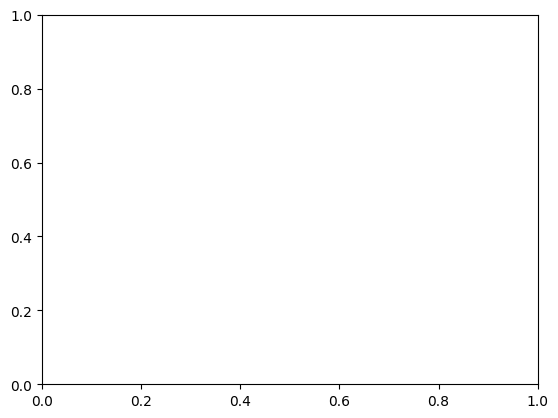

In [ ]:
xpoints = [0,0.025,0.05,0.075,0.1,0.2,0.3,0.4,0.5,0.6]
ypoints = [0.0515]+xlist

plt.plot(xpoints, ypoints)
plt.show()

In [43]:
(0.051574973119749255-0.0370959579392415)/0.051574973119749255

0.2807372317362081

In [ ]:
0.05191576002770031 is the bias score for b=0.1
0.05671085050935802 is the bias score for b=0.2
0.053943241667122235 is the bias score for b=0.3

In [ ]:
occ
0.14814030434003325 is the bias score for b=0.1
0.138774267701761 is the bias score for b=0.2
0.12251404848859358 is the bias score for b=0.3
0.10578634427741243 is the bias score for b=0.4
0.053056267841701796 is the bias score for b=0.6

NameError: name 'occ' is not defined

In [38]:
for i in range(5):
    print(.1+0.025*i)
    
# user 0 u_calibrate [289, 49, 357, 489, 189, 60, 24, 157, 1, 89, 360, 645, 95, 52, 133, 148, 31, 139, 101, 200]


0.1
0.125
0.15000000000000002
0.17500000000000002
0.2


In [32]:
reco_matrix_fair[3][0]

array([289,  49, 357, 489, 157, 189,  60,   1,  89,  24, 645, 360,  95,
        52, 133,  31, 148, 139, 200, 101])

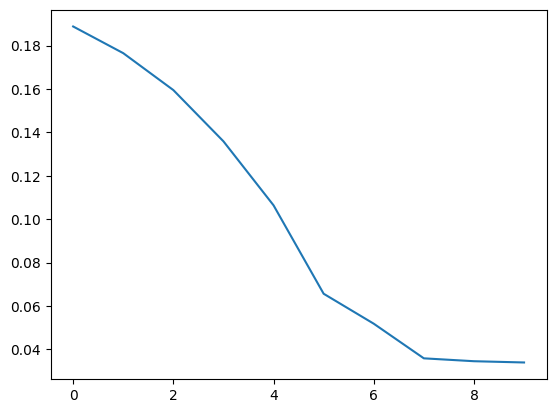

In [23]:
xpoints = list(range(len(hrlist)))
ypoints = xlist

plt.plot(xpoints, ypoints)
plt.show()

In [ ]:
print("+"*50)
print("for equation \n (1 - l - b) * sum of scores for selected items (reco)\n - l * kl div of past genre prop x reco genre prop\n - b * kl div of past gender genre prop x reco genre prop)")
print("+"*50)
data = [
    ["      ","l=.29 b=.69", "l=.49 b=.49" , "l=.69 b=.29" ,"plain"], 
    ["Hitratio@10",  round(hrl29b69,4),round(hrl49b49,4), round(hrl69b29,4),round(plain_hr,4)],                              
    ["Gender Bias", round(sum(abs(gp_1)),4),round(sum(abs(gp_2)),4),round(sum(abs(gp_3)),4), 0.1561],                         
]


print("{:<12} {:<15} {:<15} {:<15} {:<15}".format(*data[0]))  
print("-" * 50)                                      
for row in data[1:]:                                
    print("{:<12} {:<15} {:<15} {:<15} {:<15}".format(*row))
    
print("+"*50)
print("for equation \n (1 - l - b) * sum of scores for selected items (reco)\n - l * kl div of past genre prop x reco genre prop\n - b * kl div of recommended gender genre prop x reco genre prop)")
print("+"*50)
data = [
    ["      ", "l=.49 b=.49" , "l=.69 b=.29" , "l=.29 b=.29" ,"plain"], 
    ["Hitratio@10",round(hr_recol49b49,4), round(hr_recol69b29,4),round(hr_recol29b29,4),round(plain_hr,4)],                              
    ["Gender Bias",round(sum(abs(gp_reco_1)),4),round(sum(abs(gp_reco_2)),4),round(sum(abs(gp_reco_3)),4), 0.1561],                         
]


print("{:<12} {:<15} {:<15} {:<15} {:<15} ".format(*data[0]))  
print("-" * 50)                                      
for row in data[1:]:                                
    print("{:<12} {:<15} {:<15} {:<15} {:<15} ".format(*row))



++++++++++++++++++++++++++++++++++++++++++++++++++
for equation 
 (1 - l - b) * sum of scores for selected items (reco)
 - l * kl div of past genre prop x reco genre prop
 - b * kl div of past gender genre prop x reco genre prop)
++++++++++++++++++++++++++++++++++++++++++++++++++


NameError: name 'hrl29b69' is not defined